In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_blobs

In [30]:
data_X, data_y = make_blobs(1000, 2, 5)
print (data_X.shape, data_y.shape)
print(data_X[0])

(1000, 2) (1000,)
[-5.97615993 -3.31781301]


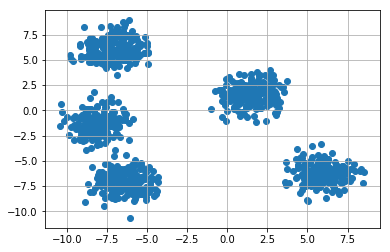

In [16]:
plt.figure(0)
plt.grid(True)
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [18]:
# Number of clusters
k = 5

# Generate random cluster centers
clusters = {}

colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']

for kx in range(k):
    cluster_id = kx
    points = []
    dim = data_X.shape[1]
    center = 10.0*(np.random.random((dim,))*2 - 1)
    color = colors[kx]
    clusters[cluster_id] = {
        'points': points,
        'center': center,
        'color': color
    }

print (clusters)

{0: {'points': [], 'center': array([3.41210836, 7.28680725]), 'color': 'red'}, 1: {'points': [], 'center': array([0.81759441, 1.38191184]), 'color': 'green'}, 2: {'points': [], 'center': array([5.60721036, 8.61147989]), 'color': 'blue'}, 3: {'points': [], 'center': array([0.25676975, 7.95623167]), 'color': 'yellow'}, 4: {'points': [], 'center': array([ 5.7630492 , -3.21722167]), 'color': 'cyan'}}


In [19]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

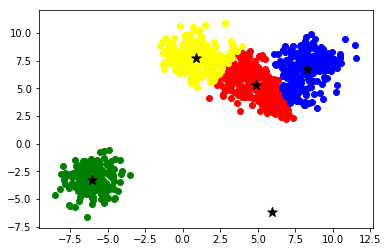

In [36]:
# Allocate points to cluster
# for every loop it calculates distance of every point with every k
# shifts the center
# prints the graph
for ix in range(data_X.shape[0]): # 1000
    # For each point, get distance with each cluster
    dist = [] # it is initializing every time
    for kx in range(k):
        d = distance(data_X[ix], clusters[kx]['center'])
        dist.append(d)
    # Get cluster id where current point belongs
    c_id = np.argmin(dist) # it return one of 0,1,2,3,4
#     print(c_id)
    
    clusters[c_id]['points'].append(data_X[ix])

for kx in range(k):
    pts = np.asarray(clusters[kx]['points'])
    if pts.shape[0] > 0: # cluster alloted at least one point
        # Compute new cluster center
        new_center = pts.mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['points'] = pts
    clusters[kx]['center'] = new_center

plt.figure(0)

for kx in range(k):
    cc = clusters[kx]['center']
    
    pts = clusters[kx]['points']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
    
    clusters[kx]['points'] = []
plt.show()